In [1]:
from dypac import Dypac
from dypac.bascpp import stab_maps
import h5py
import numpy as np
from nibabel import nifti1
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
from nilearn import plotting
import pickle as pk
import os

In [28]:
def load_dypac(subject, fwhm):
    path_data = f'/data/cisl/pbellec/cneuromod_embeddings/xp_202011/dataset-friends_tasks-s01even_cluster-50_states-150_batches-1_reps-100_fwhm-{fwhm}/'
    file_model = os.path.join(path_data, f'{subject}_dataset-friends_tasks-s01even_cluster-50_states-150_batches-1_reps-100_fwhm-{fwhm}.pickle')
    pickle_in = open(file_model, "rb")
    model = pk.load(pickle_in)
    pickle_in.close()
    mask_img = model.mask_img_
    return model, mask_img

In [31]:
model, mask_img = load_dypac(subject='sub-03', fwhm = '8')

In [32]:
file_score = os.path.join(path_data, f'{subject}_dataset-friends_tasks-s01even_cluster-50_states-150_batches-1_reps-100_fwhm-{fwhm}_r2_scores.hdf5')
hdf5_file = h5py.File(file_score, 'r')
tng_filenames = list(hdf5_file["training"].keys())
val_filenames = list(hdf5_file["validation"].keys())

In [33]:
from nilearn.image import mean_img
imgs = []
for filename in tng_filenames:
    imgs.append(nifti1.Nifti1Image(hdf5_file['training'][filename], mask_img.affine))
mean_img_training = mean_img(imgs)


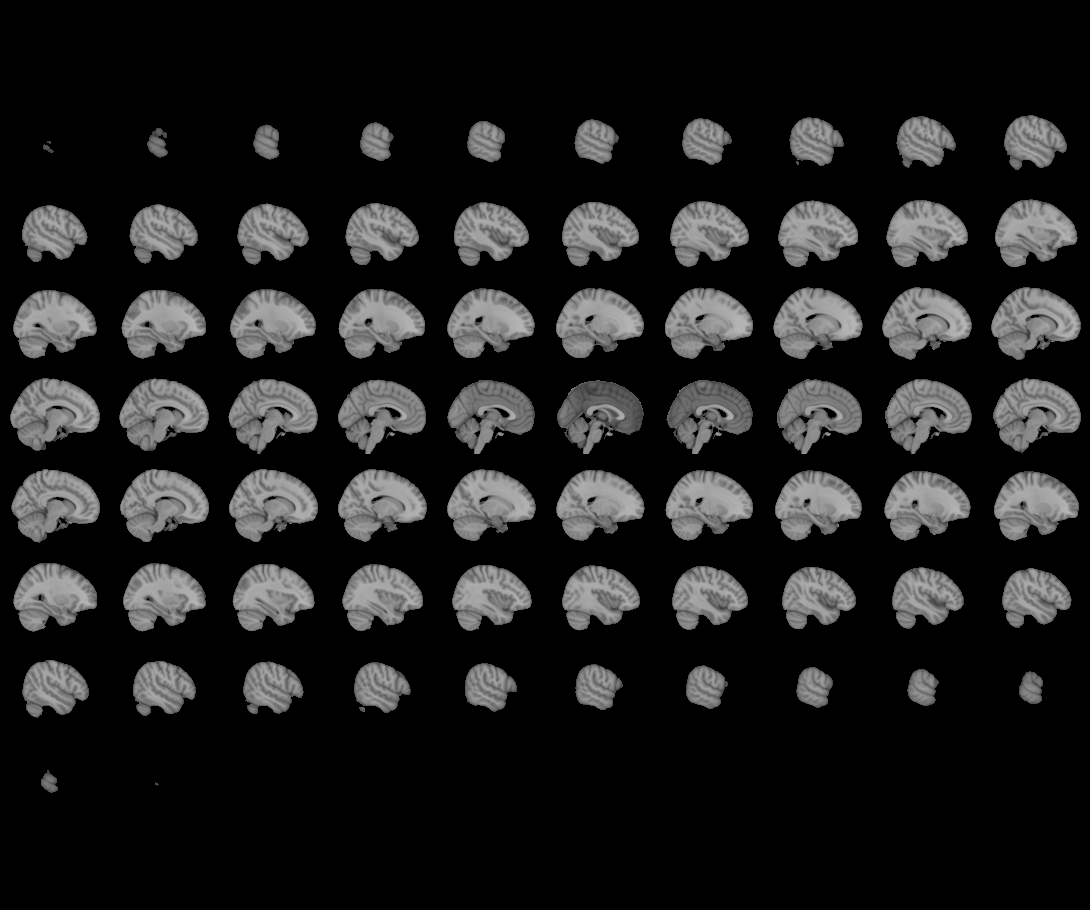
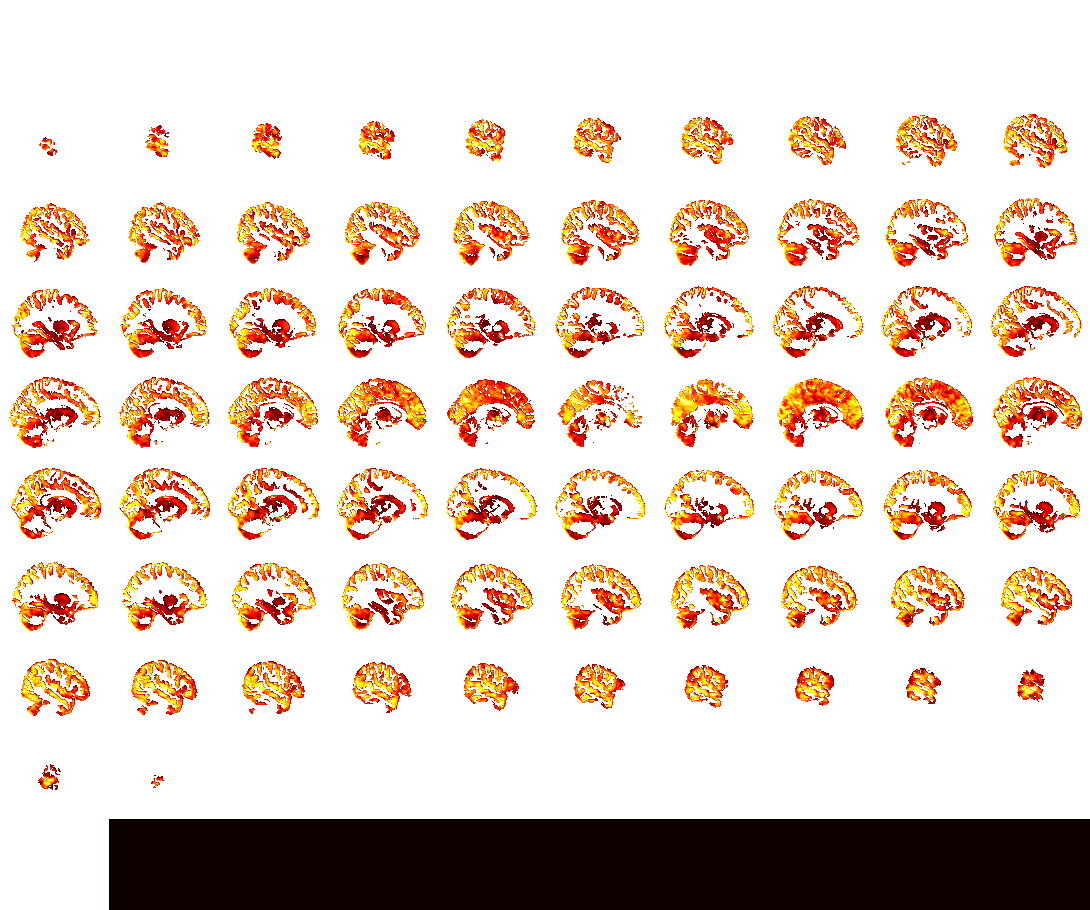

In [34]:
plotting.view_img(mean_img_training, threshold=0.1, vmax=1)

## Training

In [ ]:
n = 0
vol = hdf5_file['training'][tng_filenames[n]][:]
img = nifti1.Nifti1Image(vol, mask_img.affine)
plotting.view_img(img, threshold=0.1, vmax=1)

## Validation

In [ ]:
1n = 0
vol = hdf5_file['validation'][val_filenames[n]][:]
img = nifti1.Nifti1Image(vol, mask_img.affine)
plotting.view_img(img, threshold=0.1, vmax=1)

# Inter-subject

In [ ]:
file_score = os.path.join(path_data, f'{subject}_dataset-friends_tasks-s01even_cluster-50_states-150_batches-1_reps-100_fwhm-{fwhm}_inter_r2_scores.hdf5')
hdf5_file = h5py.File(file_score, 'r')

In [ ]:
n = 0
val_filenames = list(hdf5_file['inter']['sub-03'].keys())
vol = hdf5_file['inter']['sub-03'][val_filenames[n]]
img = nifti1.Nifti1Image(vol, mask_img.affine)
plotting.view_img(img, threshold=0.1, vmax=1)

# other atlases

In [ ]:
path_data = '/data/cisl/pbellec/cneuromod_embeddings/xp_202011/other_atlases/'
#file_score = os.path.join(path_data, f'mist444_fwhm-{fwhm}_r2_score.hdf5')
#file_score = os.path.join(path_data, f'schaefer_fwhm-{fwhm}_r2_score.hdf5')
file_score = os.path.join(path_data, f'smith_fwhm-{fwhm}_r2_score.hdf5')
hdf5_file = h5py.File(file_score, 'r')
val_filenames = list(hdf5_file[subject].keys())

In [ ]:
n = 1
vol = hdf5_file[subject][val_filenames[n]]
img = nifti1.Nifti1Image(vol, mask_img.affine)
plotting.view_img(img, threshold=0.1, vmax=1)